# Feature Engineering

interesting random states

18 0.486666666667 0.986666666667
42 0.553333333333 0.986666666667
44 0.526666666667 1.0
54 0.56 1.0
67 0.506666666667 1.0
70 0.586666666667 1.0
79 0.673333333333 1.0
96 0.526666666667 1.0
161 0.486666666667 1.0
174 0.566666666667 1.0
175 0.62 1.0

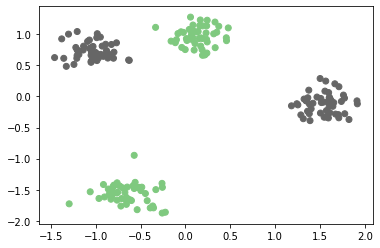

In [63]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
X, y = make_blobs(n_samples=200, centers=4, random_state=42)
X = scale(X)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')

In [64]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegressionCV().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.5

(-2, 1.8)

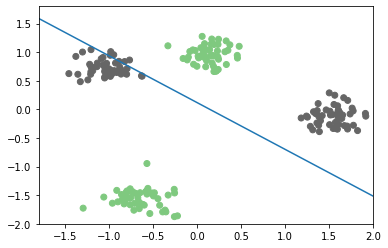

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()

plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])

plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

In [66]:
# Same as PolynomialFeatures(order=2, interactions_only=True)
X_interaction = np.hstack([X, X[:, 0:1] * X[:, 1:]])

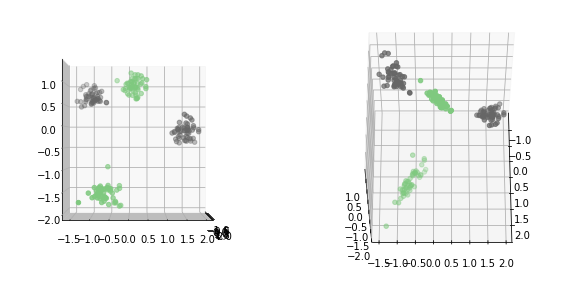

In [67]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=0., azim=0)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=60., azim=0)

In [68]:
X_i_train, X_i_test, y_train, y_test = train_test_split(X_interaction, y, random_state=0)
logreg3 = LogisticRegressionCV().fit(X_i_train, y_train)
logreg3.score(X_i_test, y_test)

0.96

(-2, 1.8)

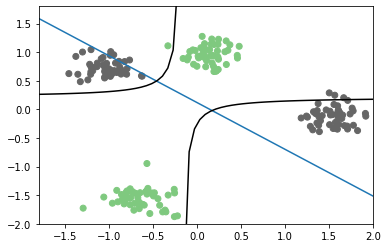

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()
coef3 = logreg3.coef_.ravel()
plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])
curve = -(coef3[0] * line + logreg3.intercept_) / (coef3[1] + line * coef3[2])
mask = coef3[1] + line * coef3[2] > 0
plt.plot(line[mask], curve[mask], c='k')
plt.plot(line[~mask], curve[~mask], c='k')
plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

# Discrete interactions

In [70]:
df = pd.DataFrame({'gender': ['M', 'F', 'M', 'F', 'F'],
                   'age': [14, 16, 12, 25, 22],
                   'spend$': [70, 12, 42, 64, 93],
                   'articles_bought': [5, 10, 2, 1, 1],
                   'time_online': [269, 1522, 235, 63, 21]
                  })
df

,gender,age,spend$,articles_bought,time_online
0,M,14,70,5,269
1,F,16,12,10,1522
2,M,12,42,2,235
3,F,25,64,1,63
4,F,22,93,1,21


In [71]:
dummies = pd.get_dummies(df)
dummies

,age,spend$,articles_bought,time_online,gender_F,gender_M
0,14,70,5,269,0,1
1,16,12,10,1522,1,0
2,12,42,2,235,0,1
3,25,64,1,63,1,0
4,22,93,1,21,1,0


In [72]:
[x + "_F" for x in dummies.columns]

['age_F',
 'spend$_F',
 'articles_bought_F',
 'time_online_F',
 'gender_F_F',
 'gender_M_F']

In [73]:
df_f = dummies.multiply(dummies.gender_F, axis='rows')
df_f = df_f.rename(columns=lambda x: x + "_F")

df_m = dummies.multiply(dummies.gender_M, axis='rows')
df_m = df_m.rename(columns=lambda x: x + "_M")

In [74]:
res = pd.concat([df_m, df_f], axis=1).drop(["gender_F_M", "gender_M_F"], axis=1)
res

,age_M,spend$_M,articles_bought_M,time_online_M,gender_M_M,age_F,spend$_F,articles_bought_F,time_online_F,gender_F_F
0,14,70,5,269,1,0,0,0,0,0
1,0,0,0,0,0,16,12,10,1522,1
2,12,42,2,235,1,0,0,0,0,0
3,0,0,0,0,0,25,64,1,63,1
4,0,0,0,0,0,22,93,1,21,1


# Polynomial Features

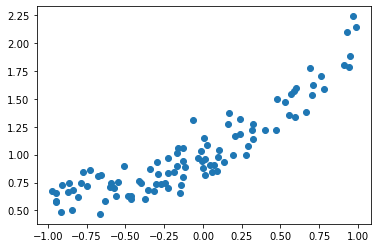

In [75]:
rng = np.random.RandomState(2)
x = rng.uniform(-1, 1, size=(100,))
X = x.reshape(-1, 1)
x_noisy = x + rng.normal(scale=0.1, size=x.shape)
coef = rng.normal(size=3)
y = coef[0] * x_noisy ** 2 + coef[1] * x_noisy + coef[2] + rng.normal(scale=0.1, size=x.shape)
plt.plot(x, y, 'o')

0.7633239152617027

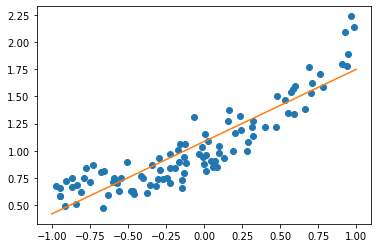

In [76]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
line = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
lr.score(X_test, y_test)

0.8336786269754218

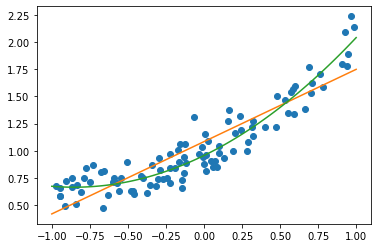

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly_lr = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

poly_lr.fit(X_train, y_train)

plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
plt.plot(line, poly_lr.predict(line))
poly_lr.score(X_test, y_test)

# Feature Distributions

In [ ]:
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 1), X.columns, rotation=30, ha="right");
plt.savefig("images/house_price_scaled_box.png")

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, X.columns[i]))
plt.savefig("images/house_price_hist.png")

In [ ]:
def bc(x, l):
    if l == 0:
        return np.log(x)
    else:
        return (x ** l - 1) / l


In [ ]:
line = np.arange(1e-10, 10, 100)

In [ ]:
line

In [ ]:
line = np.linspace(.01, 10, 100)
colors =  [plt.cm.viridis(i) for i in np.linspace(0, 1, 6)]
for l, c in zip([-1, -.5, 0, .5, 1, 2], colors):
    plt.plot(line, bc(line, l), label="lambda={}".format(l), color=c)
plt.ylim(-4, 6)
plt.gca().set_aspect("equal")
plt.legend(loc=(1, 0))
plt.xlim(0, 10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# this is very hacky and you probably shouldn't do this in real life.
X_train_mm = MinMaxScaler().fit_transform(X_train) + 1e-5

In [ ]:
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
pt = PowerTransformer()
X_bc = pt.fit_transform(X_train_mm)
print(pt.lambdas_)

for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X_bc[:, i], bins=30)
    ax.set_title("{}: {} {:.2f}".format(i, X.columns[i], pt.lambdas_[i]))
plt.savefig("images/house_price_hist_boxcox.png")

In [ ]:
X_bc_scaled = StandardScaler().fit_transform(X_bc)
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.yaxis.set_major_formatter(million_formatter)
    ax.set_ylim(0, 4000000)
    ax.scatter(X_bc_scaled[:, i], y_train, s=.1, alpha=.1)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Progression")
plt.tight_layout()
plt.savefig("images/house_price_bc_scaled_scatter.png")

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

In [ ]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
print(np.mean(scores), np.std(scores))


In [ ]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

In [ ]:
ridge = RidgeCV().fit(X_train_scaled, y_train)
ridge_bc = RidgeCV().fit(X_bc_scaled, y_train)

In [ ]:
plt.plot(ridge.coef_, 'o', label="scaled")
plt.plot(ridge_bc.coef_, 'o', label="box-cox")
plt.xlabel("coefficient index")
plt.ylabel("coefficient value")
plt.legend()

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)

In [ ]:
data.frame.columns

In [ ]:
data.frame.date

In [ ]:
import dabl
dabl.plot(data.frame, target_col='price')